In [1]:
import tensorflow as tf
import numpy as np

In [2]:
mnist = tf.keras.datasets.mnist

In [3]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [4]:
print("train_images.shape:",train_images.shape)
print("test_images.shape: ",test_images.shape)

train_images.shape: (60000, 28, 28)
test_images.shape:  (10000, 28, 28)


In [5]:
first_img = train_images[0]
#print(first_img)
print(train_labels[0])

5


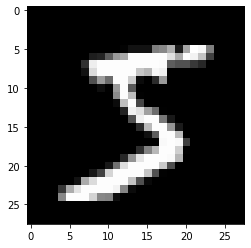

In [6]:
import matplotlib.pyplot as plt
plt.imshow(first_img, cmap='gray')
plt.show()

In [7]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [8]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2205 - accuracy: 0.9349
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0965 - accuracy: 0.9707
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0689 - accuracy: 0.9791
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0527 - accuracy: 0.9829
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0433 - accuracy: 0.9858


In [12]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 878us/step - loss: 0.0632 - accuracy: 0.9819


In [17]:
print(test_acc)

0.9818999767303467


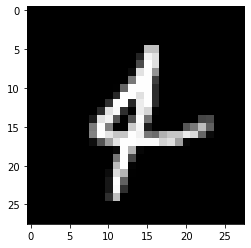

In [15]:
test_image = np.expand_dims(test_images[300],axis = 0)
plt.imshow(test_image.reshape(28,28), cmap='gray')
plt.show()

In [16]:
result = model.predict(test_image)
print("result:", result)
print("result.argmax():", result.argmax())

result: [[9.3354934e-08 1.0063084e-03 3.7423400e-05 5.1104112e-06 9.9839348e-01
  5.2450813e-09 2.9467987e-05 5.2726181e-04 1.8951714e-07 6.4875121e-07]]
result.argmax(): 4
